<a href="https://colab.research.google.com/github/Eswarkartheekgrandhi/Basic-ML/blob/main/trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"grandhieswarkartheek","key":"3e44d4d8f2487d605df8799058baa64a"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 /.kaggle/kaggle.json

chmod: cannot access '/.kaggle/kaggle.json': No such file or directory


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list


ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset                Hotel Reservations Dataset                          480KB  2023-01-04 12:50:31           5752        200  1.0              
themrityunjaypathak/most-subscribed-1000-youtube-channels        Most Subscribed 1000 Youtube Channels                28KB  2023-01-21 14:42:05            476         24  1.0              
senapatirajesh/netflix-tv-shows-and-movies                       Latest Netflix TV shows and movies                    1MB  2023-01-14 17:03:12           1952         58  0.9411765        
ulrikthygepedersen/online-retail-dataset               

In [8]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 602M/612M [00:03<00:00, 190MB/s]
100% 612M/612M [00:03<00:00, 172MB/s]


In [9]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [11]:
!pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9472 sha256=80adddb37a1b3ad5129a5c7149e7b97f692e435ef8ee512f106d1553f5f77127
  Stored in directory: /root/.cache/pip/wheels/97/a5/76/35ae3e15da1ce4530de8591b0bcd7716f6d6752a4808f01c04
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320514 sha256=e927ebb084fab2ba73c2397e88da5ba693a60ced6d36e1ee5344095d5e9f1f10
  Stored in directory: /root/.cache/pip/wheels/a3/5f/ba/ddd191edb6c749a63cffabd28714d5600b5b58014daf7434a8
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

In [12]:
import numpy as np
import pandas as pd
from PIL import Image
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from plot_keras_history import show_history, plot_history
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import random

In [13]:
images = []
image_labels = []

# Setting image_height and image_width
image_height = 35
image_width = 35

In [14]:
train_df = pd.read_csv('/content/Train.csv')

In [15]:
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [23]:
# function to open and return the resized image
def get_image(img_path, height, width):
    image = Image.open(img_path)
    resized_image = image.resize((height, width))
    return resized_image

In [24]:
# storing the image and its label
for index in range(train_df.shape[0]):
    try:
        img_path = train_df.loc[index, 'Path']
        img_label = train_df.loc[index, 'ClassId']
        
        image_path = directory_path+ '\\' + img_path
        
        image = get_image(image_path, image_height, image_width)
        image_array = np.array(image)
        images.append(image_array)
        image_labels.append(img_label)

    except:
        pass

In [27]:
def plot_images(images, image_labels):
    plt.figure(figsize = (25,25))
    for i in range(1, 26):
        plt.subplot(5, 5, i)
        random_index = random.randint(0, len(image_labels))
        image = Image.fromarray(images[random_index])
        plt.imshow(image)
        plt.xlabel("Class : "+str(image_labels[random_index]), fontsize = 20)

IndexError: ignored

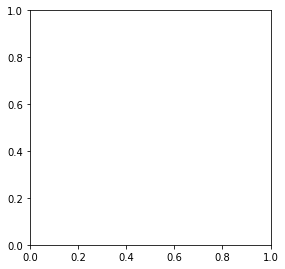

In [28]:
# plotting some random images with their classes from training set
plot_images(images, image_labels)

In [31]:
# Loading Meta Dataframe which contains all the unique classes 
meta_df = pd.read_csv('/content/Meta.csv')

In [32]:
meta_df.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [33]:
# number of class labels in the given dataset
number_of_unique_signs = meta_df['ClassId'].shape[0]

In [34]:
# Randomly shuffling the indexes for splitting
indexes = np.arange(len(images))
np.random.shuffle(indexes)

In [35]:
# Converting python lists into numpy arrays
images = np.array(images)
image_labels = np.array(image_labels)

In [36]:
# Splitting the train set into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(images, image_labels, test_size=0.2)

ValueError: ignored